# 1. OLS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [56]:
np.random.seed(42)
x = np.random.rand(20, 1) * 10
y = 3.5 * x.flatten() + 7 + np.random.randn(20) * 3

In [57]:
np.shape(x.flatten())

(20,)

In [58]:
x

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ]])

In [59]:
np.shape( x)

(20, 1)

In [60]:
x

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ]])

In [61]:
ols_model = LinearRegression()
ols_model.fit(x,y)

LinearRegression()

In [62]:
m_ols = ols_model.coef_[0]
b_ols = ols_model.intercept_
y_perd = ols_model.predict(x)

mse = mean_squared_error(y,y_perd )


In [63]:
print("OLS Coefficient (m):", m_ols)
print("OLS Intercept (b):", b_ols)
print("mean_squared_error :", mse)

OLS Coefficient (m): 3.3450395799702957
OLS Intercept (b): 6.890815009000928
mean_squared_error : 6.978683920227182


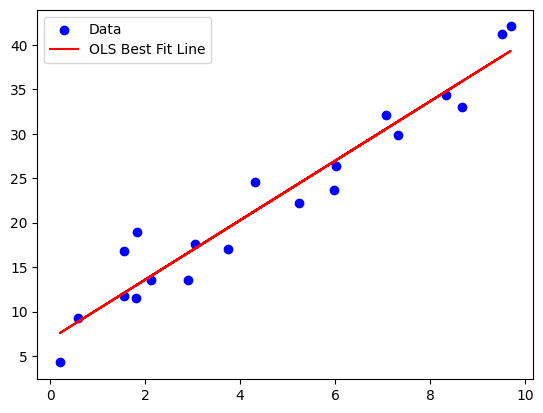

In [64]:
plt.scatter(x, y, color='blue', label="Data")
plt.plot(x, y_perd, color='red', label="OLS Best Fit Line")
plt.legend()
plt.show()

# 2.1 Gradient Descent without outliers

1: m=2.795, b=0.469, mse=106.995
2: m=3.820, b=0.666, mse=32.398
3: m=4.194, b=0.762, mse=22.158
4: m=4.327, b=0.822, mse=20.643
5: m=4.373, b=0.868, mse=20.312
6: m=4.386, b=0.908, mse=20.142
7: m=4.387, b=0.947, mse=19.996
8: m=4.384, b=0.984, mse=19.855
9: m=4.380, b=1.021, mse=19.716
10: m=4.374, b=1.058, mse=19.578
11: m=4.369, b=1.095, mse=19.442
12: m=4.363, b=1.131, mse=19.307
13: m=4.358, b=1.167, mse=19.174
14: m=4.352, b=1.203, mse=19.042
15: m=4.347, b=1.239, mse=18.911
16: m=4.341, b=1.274, mse=18.782
17: m=4.336, b=1.310, mse=18.655
18: m=4.330, b=1.345, mse=18.529
19: m=4.325, b=1.380, mse=18.404
20: m=4.320, b=1.414, mse=18.281
21: m=4.314, b=1.449, mse=18.159
22: m=4.309, b=1.483, mse=18.038
23: m=4.304, b=1.518, mse=17.919
24: m=4.299, b=1.552, mse=17.801
25: m=4.293, b=1.585, mse=17.685
26: m=4.288, b=1.619, mse=17.569
27: m=4.283, b=1.652, mse=17.455
28: m=4.278, b=1.686, mse=17.342
29: m=4.273, b=1.719, mse=17.231
30: m=4.268, b=1.752, mse=17.121
31: m=4.263, b=1.7

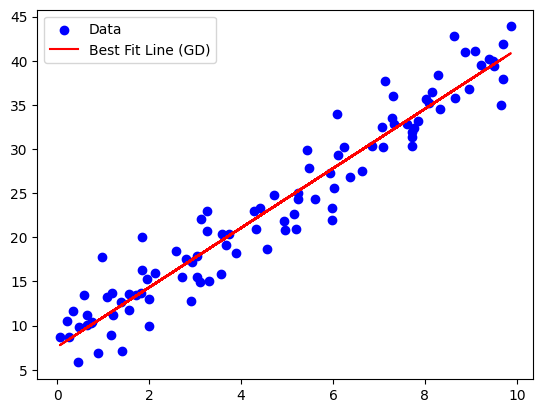

In [77]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.random.rand(100) * 10
y = 3.5 * X + 7 + np.random.randn(100) * 3

def mse(m, b, X, y):
    y_pred = m * X + b
    return np.mean((y - y_pred) ** 2)

def dm(m, b, X, y):
    y_pred = m * X + b
    return (-2 / len(X)) * np.sum(X * (y - y_pred))

def db(m, b, X, y):
    y_pred = m * X + b
    return (-2 / len(X)) * np.sum(y - y_pred)

def gradient_descent(X, y, start_m, start_b, learning_rate, num_iterations):
    m = start_m
    b = start_b
    history = []
    counter = 0
    for i in range(num_iterations):
        grad_m = dm(m, b, X, y)
        grad_b = db(m, b, X, y)

        m -= learning_rate * grad_m
        b -= learning_rate * grad_b
        counter = counter +1
        print(f"{counter}: m={m:.3f}, b={b:.3f}, mse={mse(m, b, X, y):.3f}")
        history.append((m, b, mse(m, b, X, y)))

    return m, b, history


start_m, start_b = 0, 0
learning_rate = 0.01 # ways to select learning_rate (later)
num_iterations = 900

m_opt, b_opt, history = gradient_descent(X, y, start_m, start_b, learning_rate, num_iterations)

print("m Final:", m_opt)
print("b Final:", b_opt)
print("Final MSE:", mse(m_opt, b_opt, X, y))

plt.scatter(X, y, color='blue', label="Data")
plt.plot(X, m_opt * X + b_opt, color='red', label="Best Fit Line (GD)")
plt.legend()
plt.show()

# 2.2 Gradient Descent with outliers

1: m=5.528, b=0.984, mse=808.968
2: m=1.314, b=0.615, mse=696.486
3: m=4.435, b=1.263, mse=631.753
4: m=2.034, b=1.142, mse=594.107
5: m=3.792, b=1.597, mse=571.834
6: m=2.418, b=1.617, mse=558.291
7: m=3.403, b=1.961, mse=549.710
8: m=2.612, b=2.059, mse=543.956
9: m=3.158, b=2.340, mse=539.817
10: m=2.698, b=2.480, mse=536.606
11: m=2.996, b=2.724, mse=533.934
12: m=2.723, b=2.887, mse=531.579
13: m=2.881, b=3.108, mse=529.416
14: m=2.715, b=3.284, mse=527.373
15: m=2.793, b=3.491, mse=525.409
16: m=2.687, b=3.672, mse=523.503
17: m=2.720, b=3.871, mse=521.639
18: m=2.649, b=4.054, mse=519.811
19: m=2.657, b=4.246, mse=518.013
20: m=2.606, b=4.429, mse=516.244
21: m=2.599, b=4.617, mse=514.502
22: m=2.559, b=4.799, mse=512.785
23: m=2.545, b=4.983, mse=511.092
24: m=2.511, b=5.163, mse=509.424
25: m=2.493, b=5.344, mse=507.779
26: m=2.463, b=5.522, mse=506.157
27: m=2.442, b=5.700, mse=504.559
28: m=2.415, b=5.875, mse=502.982
29: m=2.393, b=6.051, mse=501.428
30: m=2.367, b=6.224, m

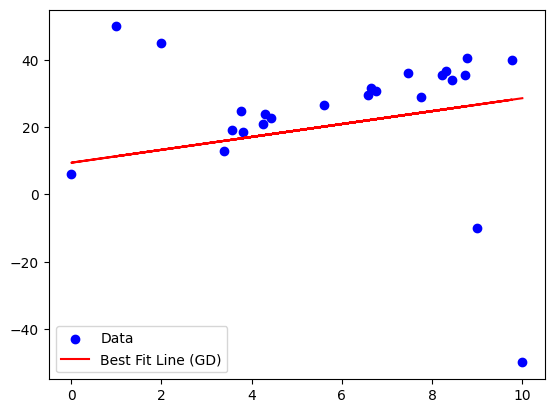

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(20) * 10
y = 3.5 * X + 7 + np.random.randn(20) * 2

X_outliers = np.array([1,2,9,10])
y_outliers = np.array([50,45,-10,-50])
X = np.concatenate([X, X_outliers])
y = np.concatenate([y, y_outliers])


def mse(m, b, X, y):
    y_pred = m * X + b
    return np.mean((y - y_pred) ** 2)

def dm(m, b, X, y):
    y_pred = m * X + b
    return (-2 / len(X)) * np.sum(X * (y - y_pred))

def db(m, b, X, y):
    y_pred = m * X + b
    return (-2 / len(X)) * np.sum(y - y_pred)

def gradient_descent(X, y, start_m, start_b, learning_rate, num_iterations):
    m = start_m
    b = start_b
    history = []
    counter = 0
    for i in range(num_iterations):
        grad_m = dm(m, b, X, y)
        grad_b = db(m, b, X, y)

        m -= learning_rate * grad_m
        b -= learning_rate * grad_b
        counter = counter +1
        print(f"{counter}: m={m:.3f}, b={b:.3f}, mse={mse(m, b, X, y):.3f}")
        history.append((m, b, mse(m, b, X, y)))

    return m, b, history


start_m, start_b = 0, 0
learning_rate = 0.02 # ways to select learning_rate (later)
num_iterations = 50

m_opt, b_opt, history = gradient_descent(X, y, start_m, start_b, learning_rate, num_iterations)

print("m Final:", m_opt)
print("b Final:", b_opt)
print("Final MSE:", mse(m_opt, b_opt, X, y))

plt.scatter(X, y, color='blue', label="Data")
plt.plot(X, m_opt * X + b_opt, color='red', label="Best Fit Line (GD)")
plt.legend()
plt.show()

1: m=5.635, b=0.936, mse=76.810
2: m=3.981, b=0.793, mse=27.551
3: m=4.442, b=0.961, mse=22.957
4: m=4.290, b=1.037, mse=22.136
5: m=4.316, b=1.139, mse=21.644
6: m=4.290, b=1.231, mse=21.191
7: m=4.280, b=1.325, mse=20.751
8: m=4.265, b=1.417, mse=20.322
9: m=4.252, b=1.507, mse=19.904
10: m=4.239, b=1.597, mse=19.497
11: m=4.226, b=1.685, mse=19.100
12: m=4.213, b=1.773, mse=18.713
13: m=4.200, b=1.859, mse=18.335
14: m=4.187, b=1.944, mse=17.967
15: m=4.175, b=2.028, mse=17.609
16: m=4.163, b=2.111, mse=17.259
17: m=4.151, b=2.193, mse=16.918
18: m=4.139, b=2.274, mse=16.586
19: m=4.127, b=2.354, mse=16.262
20: m=4.115, b=2.433, mse=15.946
21: m=4.104, b=2.510, mse=15.638
22: m=4.092, b=2.587, mse=15.338
23: m=4.081, b=2.663, mse=15.046
24: m=4.070, b=2.738, mse=14.761
25: m=4.059, b=2.812, mse=14.483
26: m=4.048, b=2.885, mse=14.212
27: m=4.037, b=2.957, mse=13.947
28: m=4.027, b=3.029, mse=13.690
29: m=4.017, b=3.099, mse=13.439
30: m=4.006, b=3.168, mse=13.194
31: m=3.996, b=3.23

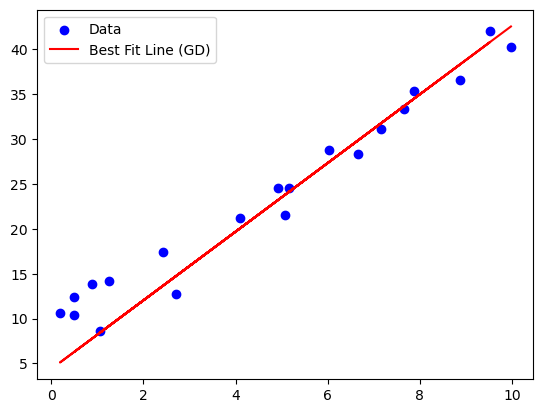